## Coding sprint (15/12)
## Task:
Predict 'Total alcohol consumption per capita (liters of pure alcohol, projected estimates, 15+ years of age)' from other World development indicators
https://datacatalog.worldbank.org/home

### Group 1
https://pypi.org/project/wbgapi/
1. Access world bank data via python API, wbgapi
2. Get the alcohol indicator, and search other indicators (year 2019)
3. Your final product is pandas DataFrame containing 10 relevant indicators of your choice

### Group 2
https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html
1. Your input is the DF from the above
2. Solve the problem with missing values (what are you going to do? substitute, invent a value, ignore a country?)
3. Find 5 best candidate predictors of the alcohol comsuption out of the 10 in the table

### Group 3
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html
1. Your input is Dataframe with 5 predictors (features) and target alcohol column.
2. Split the data into train and test.
3. prepare a linear regression model (scikit learn LinearRegression()) to fit the data
5. Find evaluation metrics of the model.
6. Predict the test data. How is the performance between train and test?

In [1]:
import wbgapi as wb
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
import datapackage

In [23]:
# help(wb)

In [ ]:
sklearn.model_

In [3]:
help(wb.series)

Help on module wbgapi.series in wbgapi:

NAME
    wbgapi.series - Access information about series in a database

FUNCTIONS
    Series(id='all', q=None, topic=None, db=None, name='SeriesName')
        Return a pandas Series by calling list
    
    get(id, db=None)
        Retrieve a specific series object
        
        Arguments:
            id:     the series identifier
        
            db:     database; pass None to access the global database
        
        Returns:
            a series object
        
        Example:
            print(wbgapi.series.get('SP.POP.TOTL')['value'])
    
    info(id='all', q=None, topic=None, db=None)
        Print a user report of series. This can be time consuming
        for large databases like the WDI if 'all' series are requested.
        
        Arguments:
            id:         a series identifier or list-like of identifiers
        
            q:          search string (on series name))
        
            topic:      topic ID or li

In [17]:
wb.search('CO2 emissions')

ID,Name,Field,Value
EN.ATM.CO2E.EG.ZS,,Developmentrelevance,"...Framework Convention on Climate Change (UNFCCC), is working towards curbing CO2 emissions globally...."
EN.ATM.CO2E.GF.KT,,Developmentrelevance,"...Framework Convention on Climate Change (UNFCCC), is working towards curbing CO2 emissions globally...."
EN.ATM.CO2E.GF.KT,,IndicatorName,CO2 emissions from gaseous fuel consumption (kt)
EN.ATM.CO2E.GF.ZS,,Developmentrelevance,"...Framework Convention on Climate Change (UNFCCC), is working towards curbing CO2 emissions globally...."
EN.ATM.CO2E.GF.ZS,,IndicatorName,CO2 emissions from gaseous fuel consumption (% of total)
EN.ATM.CO2E.KD.GD,,IndicatorName,CO2 emissions (kg per 2015 US$ of GDP)
EN.ATM.CO2E.KT,,Developmentrelevance,"...Framework Convention on Climate Change (UNFCCC), is working towards curbing CO2 emissions globally...."
EN.ATM.CO2E.KT,,IndicatorName,CO2 emissions (kt)
EN.ATM.CO2E.LF.KT,,Developmentrelevance,"...Framework Convention on Climate Change (UNFCCC), is working towards curbing CO2 emissions globally...."
EN.ATM.CO2E.LF.KT,,IndicatorName,CO2 emissions from liquid fuel consumption (kt)


In [25]:
wb.series.info(q='gini')

id,value
SI.POV.GINI,Gini index
,1 elements


In [49]:
# , 'SI.POV.GINI'
df = wb.data.DataFrame(['SI.POV.GINI'], labels=True)

In [50]:
df

,Country,YR1960,YR1961,YR1962,YR1963,YR1964,YR1965,YR1966,YR1967,YR1968,...,YR2013,YR2014,YR2015,YR2016,YR2017,YR2018,YR2019,YR2020,YR2021,YR2022
economy,,,,,,,,,,,,,,,,,,,,,
ZWE,Zimbabwe,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,44.3,NaN,50.3,NaN,NaN,NaN
ZMB,Zambia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,55.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN
YEM,"Yemen, Rep.",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,36.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PSE,West Bank and Gaza,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,33.7,NaN,NaN,NaN,NaN,NaN,NaN
VIR,Virgin Islands (U.S.),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CEB,Central Europe and the Baltics,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CSS,Caribbean small states,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ARB,Arab World,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
df1 = wb.data.DataFrame(['SE.ADT.1524.LT.FE.ZS', 'SH.ALC.PCAP.LI', 'SL.UEM.TOTL.NE.ZS'], labels=True, time=2019).reset_index()

In [15]:
df1[df1.columns[2:]].corr()

,SE.ADT.1524.LT.FE.ZS,SH.ALC.PCAP.LI,SL.UEM.TOTL.NE.ZS
SE.ADT.1524.LT.FE.ZS,1.000000,0.302573,0.192312
SH.ALC.PCAP.LI,0.302573,1.000000,-0.077920
SL.UEM.TOTL.NE.ZS,0.192312,-0.077920,1.000000


<Axes: xlabel='SH.ALC.PCAP.LI', ylabel='SL.UEM.TOTL.NE.ZS'>

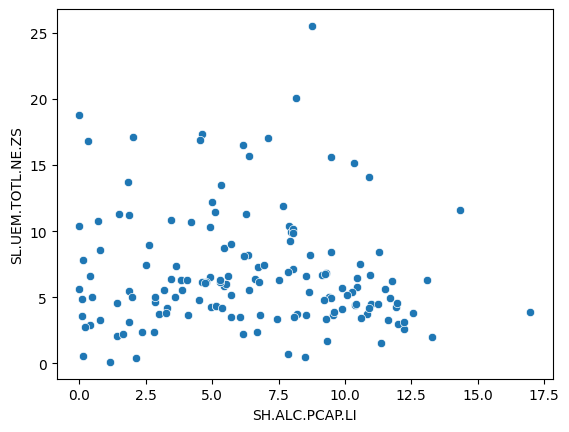

In [16]:
sns.scatterplot(data=df1, x='SH.ALC.PCAP.LI', y='SL.UEM.TOTL.NE.ZS')

In [ ]:
df = wb.data.DataFrame(['SH.ALC.PCAP.LI', 'NY.GDP.PCAP.CD', 'RL.EST'], labels=True, time=2019).reset_index()

In [45]:
df

,economy,Country,NY.GDP.PCAP.CD,RL.EST,SH.ALC.PCAP.LI
0,ZWE,Zimbabwe,1421.868596,-1.303515,3.628090
1,ZMB,Zambia,1268.120941,-0.474515,3.851760
2,YEM,"Yemen, Rep.",693.816484,-1.790671,0.027780
3,PSE,West Bank and Gaza,3656.858271,-0.504967,NaN
4,VIR,Virgin Islands (U.S.),38596.030712,1.026434,NaN
...,...,...,...,...,...
261,CEB,Central Europe and the Baltics,16349.005358,NaN,12.554616
262,CSS,Caribbean small states,10409.716383,NaN,5.283409
263,ARB,Arab World,6498.529037,NaN,0.358012
264,AFW,Africa Western and Central,1810.538006,NaN,4.256345


In [20]:
df1 = df1[~df1.isnull().any(axis=1)]
len(df1)

55

In [27]:
df1[df1.columns[2:-1]]

,SE.ADT.1524.LT.FE.ZS,SH.ALC.PCAP.LI
0,88.849998,3.628090
5,98.537666,9.339840
8,99.999924,2.602230
9,99.320000,5.452650
12,99.216179,2.368730
18,99.847313,1.820360
22,84.005653,1.420140
36,99.212463,2.829540
39,98.829567,8.766210
45,99.942902,1.872870


In [57]:

def iso_codes():
    '''Download iso codes and continent for all countries.'''
    # iso codes and country names
    data_url = 'https://datahub.io/core/country-codes/datapackage.json'
    package = datapackage.Package(data_url)
    resources = package.resources
    for resource in resources:
        if resource.tabular:
            codes = pd.read_csv(resource.descriptor['path'])
    iso_dict = dict(zip(codes['ISO3166-1-Alpha-3'],
                        codes['UNTERM English Short']))
    iso_df = pd.DataFrame.from_dict(iso_dict,
                                    orient='index',
                                    columns=['Country'])
    iso_df.index.names=['iso']
    # continent info
    continent_dict = dict(zip(codes['ISO3166-1-Alpha-3'],
                              codes['Region Name']))
    continent_df = pd.DataFrame.from_dict(continent_dict,
                                          orient='index',
                                          columns=['Region'])
    return iso_df, continent_df

In [58]:
df_iso, cont_df = iso_codes()

In [59]:
df_iso.head()

,Country
iso,
TWN,NaN
AFG,Afghanistan
ALB,Albania
DZA,Algeria
ASM,NaN


In [42]:
df[df.columns[2:]].corr()

,NY.GDP.PCAP.CD,RL.EST,SH.ALC.PCAP.LI,SI.POV.GINI
NY.GDP.PCAP.CD,1.000000,0.816940,0.452396,-0.334524
RL.EST,0.816940,1.000000,0.528422,-0.505047
SH.ALC.PCAP.LI,0.452396,0.528422,1.000000,-0.368334
SI.POV.GINI,-0.334524,-0.505047,-0.368334,1.000000


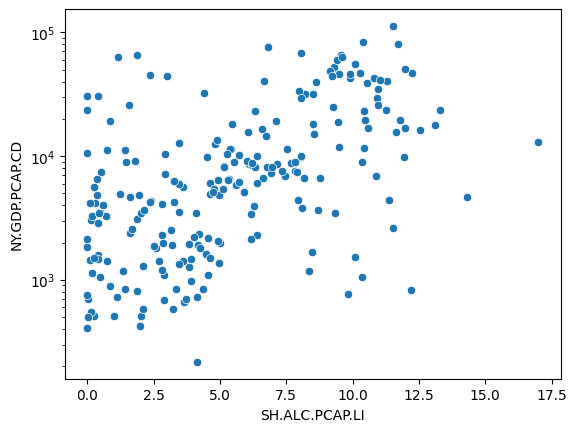

In [32]:
sns.scatterplot(data=df, x='SH.ALC.PCAP.LI', y='NY.GDP.PCAP.CD')
plt.yscale('log')

In [38]:
df[['SH.ALC.PCAP.LI', 'NY.GDP.PCAP.CD', 'RL.EST', 'SI.POV.GINI']].corr()

,SH.ALC.PCAP.LI,NY.GDP.PCAP.CD,RL.EST,SI.POV.GINI
SH.ALC.PCAP.LI,1.000000,0.448747,0.505435,-0.368334
NY.GDP.PCAP.CD,0.448747,1.000000,0.674415,-0.333828
RL.EST,0.505435,0.674415,1.000000,-0.504837
SI.POV.GINI,-0.368334,-0.333828,-0.504837,1.000000


In [65]:
sns.heatmap(df[['SH.ALC.PCAP.LI', 'NY.GDP.PCAP.CD', 'RL.EST', 'SI.POV.GINI']].corr())

KeyError: "None of [Index(['SH.ALC.PCAP.LI', 'NY.GDP.PCAP.CD', 'RL.EST', 'SI.POV.GINI'], dtype='object')] are in the [columns]"

In [67]:
import numpy as np
d = {}
for i in list('abcfg'):
    d[i] = np.random.rand()

{'a': 0.68311515995761,
 'b': 0.717822262911779,
 'c': 0.6561442947782731,
 'f': 0.3333361086982619,
 'g': 0.9968561268115215}

In [ ]:
superlst = [[d, d, d], [d, d, d]]
[lst[0] for lst in superlst]
[dc['a'] for lst in superlst for dc in lst]

In [87]:
lst[0]

[{'a': 0.68311515995761,
  'b': 0.717822262911779,
  'c': 0.6561442947782731,
  'f': 0.3333361086982619,
  'g': 0.9968561268115215},
 {'a': 0.68311515995761,
  'b': 0.717822262911779,
  'c': 0.6561442947782731,
  'f': 0.3333361086982619,
  'g': 0.9968561268115215},
 {'a': 0.68311515995761,
  'b': 0.717822262911779,
  'c': 0.6561442947782731,
  'f': 0.3333361086982619,
  'g': 0.9968561268115215}]

In [64]:
ans = []
for l in lst:
    ans.append(l[0])
ans

[1, 4]